In [7]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Read the CSV file
df = pd.read_csv("./data/unified_data_5_years.csv")

# Drop unnecessary columns
df = df.drop(columns=["system:index", ".geo", "biome"])

# Convert 'soil' and 'ecoreg' to categorical data
categorical = ["soil", "ecoreg"]
df[categorical] = df[categorical].astype("category")

# Create dummy variables for 'ecoreg' and 'soil'
df = pd.get_dummies(df, columns=["ecoreg", "soil"])

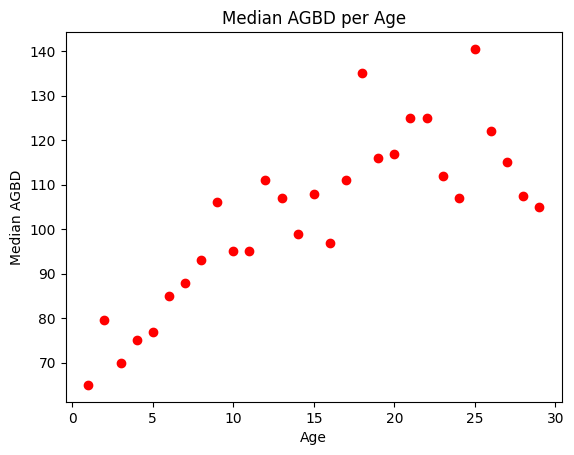

In [9]:
median_agbd = df.groupby("age")["agbd"].median()
# write a pandas dataframe that has the median AGBD for each age
median_agbd = pd.DataFrame(median_agbd).reset_index()


def plot_median_agbd(median_agbd):
    plt.scatter(median_agbd["age"], median_agbd["agbd"], color="red")
    plt.xlabel("Age")
    plt.ylabel("Median AGBD")
    plt.title("Median AGBD per Age")
    plt.show()

# Assuming 'median_agbd' is your DataFrame with 'agbd' and 'age' columns
plot_median_agbd(median_agbd)

In [12]:
# write the growth curve with yearly climatic data and permanent non-climatic data
def growth_curve(pars, data):
    r"""This function defines the growth function and parameter dictionary"""

    return (
        pars["B0"]
        + pars["A"] * (1 - np.exp(-pars["age"] * data["age"])) ** pars["theta"]
    )


# Initial guesses
initial_guess = [70, 150, 5, 1, 10]  # B0, A, theta, sd, age


# Define a function to unpack parameters from a list
def unpack_parameters(params):
    return {
        "B0": params[0],
        "A": params[1],
        "theta": params[2],
        "age": params[3],
        "sd": params[4],
    }


# Modify the neg_log_likelihood function to unpack parameters
def neg_log_likelihood(params, data):
    params = unpack_parameters(params)
    likelihood = norm.logpdf(
        data["agbd"] - growth_curve(params, data), loc = 0, scale = params["sd"]
    )
    return -np.sum(likelihood)


# Define bounds
bounds = [
    (30, 100),
    (50, 400),
    (0, 10),
    (0, 2),
    (0, 10)]  # B0, A, theta, sd

# Call minimize with bounds
result = minimize(neg_log_likelihood, initial_guess, args=(median_agbd,), bounds=bounds)

In [13]:
optimal_params = result.x
# Generate predicted values
predicted = growth_curve(unpack_parameters(optimal_params), median_agbd)
predicted

# # Compare predicted values to observed data
# residuals = data["agbd"] - predicted

# rmse = np.sqrt(np.mean(residuals**2))
# print(f"Root Mean Square Error: {rmse}")

0     100.0
1     100.0
2     100.0
3     100.0
4     100.0
5     100.0
6     100.0
7     100.0
8     100.0
9     100.0
10    100.0
11    100.0
12    100.0
13    100.0
14    100.0
15    100.0
16    100.0
17    100.0
18    100.0
19    100.0
20    100.0
21    100.0
22    100.0
23    100.0
24    100.0
25    100.0
26    100.0
27    100.0
28    100.0
Name: age, dtype: float64

Root Mean Square Error: 55.27293230777933


/tmp/ipykernel_176773/2187062385.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(limits, limits, "k-", color="r")


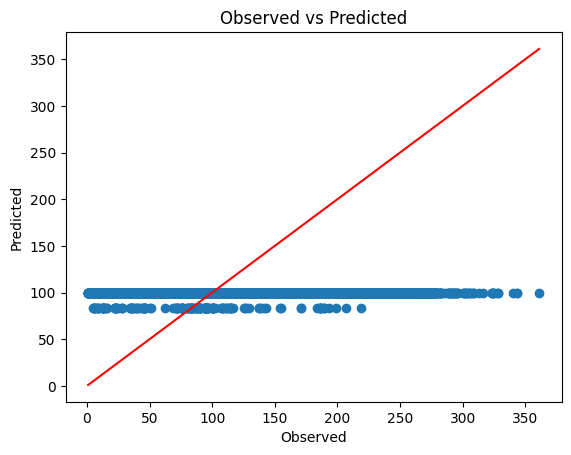

In [45]:

# Scatter plot of observed vs predicted
plt.scatter(data["agbd"], predicted)
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.title("Observed vs Predicted")

# Plot a diagonal line for reference
limits = [
    min(min(data["agbd"]), min(predicted)),
    max(max(data["agbd"]), max(predicted)),
]
plt.plot(limits, limits, "k-", color="r")

plt.show()

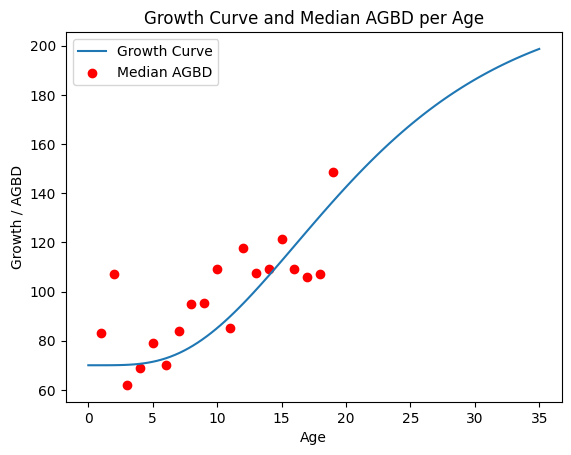

In [27]:
def plot_growth_curve(pars, data):
    ages = np.linspace(0, 35, 100)  # Create an array of ages from 0 to 35
    growth_data = {"age": ages}  # Create a dictionary with the ages

    # Compute the growth for each age
    growth = growth_curve(pars, growth_data)

    # Compute the median agbd for each age
    median_agbd = data.groupby("age")["agbd"].median()

    # Plot the growth curve
    plt.plot(ages, growth, label="Growth Curve")

    # Add the scatterplot of median agbd per age
    plt.scatter(median_agbd.index, median_agbd.values, color="red", label="Median AGBD")

    plt.xlabel("Age")
    plt.ylabel("Growth / AGBD")
    plt.title("Growth Curve and Median AGBD per Age")
    plt.legend()
    plt.show()

# Define the parameters
pars = {"B0": 70, "A": 150, "theta": 5, "age": 0.1}

# Assuming 'data' is your DataFrame with 'agbd' and 'age' columns
# Plot the growth curve and median agbd per age
plot_growth_curve(pars, data)